**Introduction to TensorFlow in Google Colab**

This lab introduces the basics of TensorFlow by building and training a simple neural network on the MNIST dataset (handwritten digit classification).

**Step 1: Set Up Colab Environment**

In [1]:
# Install TensorFlow (skip if already installed)
!pip install tensorflow --upgrade

# Verify installation and GPU access
import tensorflow as tf
# print("TensorFlow version:", tf.__version__)
# print("GPU available:", tf.config.list_physical_devices('GPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tens

**Step 2: Load and Preprocess Data**

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (for Conv2D layers)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Training data shape:", x_train.shape)  # (60000, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)


**Step 3: Build the Model**

A simple Convolutional Neural Network (CNN) for image classification:

In [3]:
model = tf.keras.Sequential([
    # Feature extraction
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    # Classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()  # Visualize architecture

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Step 4: Train the Model**

In [4]:
# Train for 5 epochs
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9156 - loss: 0.2848 - val_accuracy: 0.9835 - val_loss: 0.0535
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9858 - loss: 0.0472 - val_accuracy: 0.9885 - val_loss: 0.0389
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9913 - val_loss: 0.0274
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9907 - val_loss: 0.0310
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9960 - loss: 0.0131 - val_accuracy: 0.9908 - val_loss: 0.0295


**Step 5: Evaluate and Predict**

In [5]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Predict a sample image
import numpy as np
sample = x_test[0]  # First test image
prediction = model.predict(sample[np.newaxis, ...])
print("Predicted digit:", np.argmax(prediction))

313/313 - 4s - 13ms/step - accuracy: 0.9908 - loss: 0.0295

Test accuracy: 0.9908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted digit: 7


**Step 6: Visualize Results**

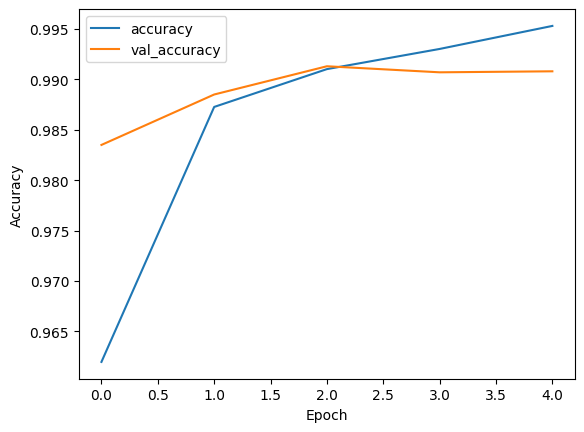

In [6]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()